In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/Dataset of Diabetes .csv


**The dataset is taken from https://data.mendeley.com/datasets/wj9rwkp9c2/1**

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [65]:
data = pd.read_csv('/kaggle/input/diabetes/Dataset of Diabetes .csv')
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


The data consist of medical information, laboratory analysis… etc. The data that have been entered initially into the system are: No. of Patient, Sugar Level Blood, Age, Gender, Creatinine ratio(Cr), Body Mass Index (BMI), Urea, Cholesterol (Chol), Fasting lipid profile, including total, LDL, VLDL, Triglycerides(TG) and HDL Cholesterol , HBA1C, Class (the patient's diabetes disease class may be Diabetic, Non-Diabetic, or Predict-Diabetic).

In [67]:
data.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [68]:
data.drop(['ID','No_Pation'],axis=1,inplace=True)

In [69]:
data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [70]:
data['CLASS'].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [71]:
data['CLASS'].replace(['Y',' Y','Y ','P','P '],1,inplace=True)
data['CLASS'].replace([' N','N ','N'],0,inplace=True)
data['Gender'].replace(['F','F ',' F','f'],0,inplace=True)
data['Gender'].replace(['M','M ',' M'],1,inplace=True)

In [72]:
data['CLASS'].value_counts(normalize=True)

CLASS
1    0.897
0    0.103
Name: proportion, dtype: float64

<Axes: xlabel='CLASS'>

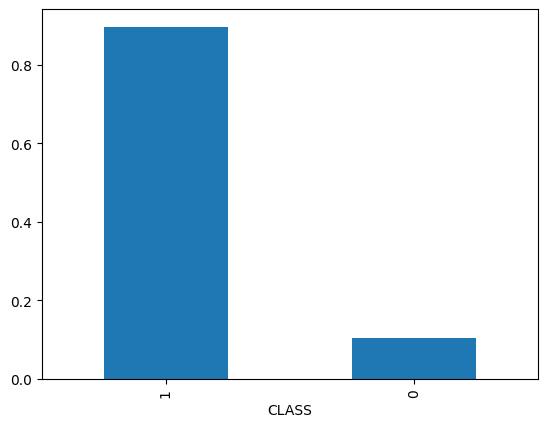

In [73]:
data.CLASS.value_counts(normalize=True).plot(kind='bar')

In [74]:
data['Gender'].value_counts()

Gender
1    565
0    435
Name: count, dtype: int64

In [75]:
data['Gender'] = data['Gender'].astype(int)
data['CLASS'] = data['CLASS'].astype(int)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   int64  
 1   AGE     1000 non-null   int64  
 2   Urea    1000 non-null   float64
 3   Cr      1000 non-null   int64  
 4   HbA1c   1000 non-null   float64
 5   Chol    1000 non-null   float64
 6   TG      1000 non-null   float64
 7   HDL     1000 non-null   float64
 8   LDL     1000 non-null   float64
 9   VLDL    1000 non-null   float64
 10  BMI     1000 non-null   float64
 11  CLASS   1000 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 93.9 KB


In [77]:
data.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.565000,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,0.897000
std,0.496005,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,0.304111
min,0.000000,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000
25%,0.000000,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,1.000000
50%,1.000000,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,1.000000
75%,1.000000,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,1.000000
max,1.000000,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000,1.000000


In [78]:
corr_values = data.corr()

tril_index = np.tril_indices_from(corr_values)

for coord in zip(*tril_index):
    corr_values.iloc[coord[0],coord[1]] = np.NaN


In [79]:
corr_values

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
Gender,NaN,0.021486,0.116311,0.154870,-0.009362,-0.064763,0.052111,-0.130130,0.054563,0.194120,0.072097,0.127381
AGE,NaN,NaN,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956,0.358132
Urea,NaN,NaN,NaN,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618,0.051303
Cr,NaN,NaN,NaN,NaN,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746,0.034742
HbA1c,NaN,NaN,NaN,NaN,NaN,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350,0.497838
Chol,NaN,NaN,NaN,NaN,NaN,NaN,0.321789,0.103814,0.416665,0.076294,0.013678,0.154675
TG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.083001,0.015378,0.144570,0.110757,0.175269
HDL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.142079,-0.059275,0.072409,-0.011517
LDL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062795,-0.067322,-0.004698
VLDL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.198133,0.084305


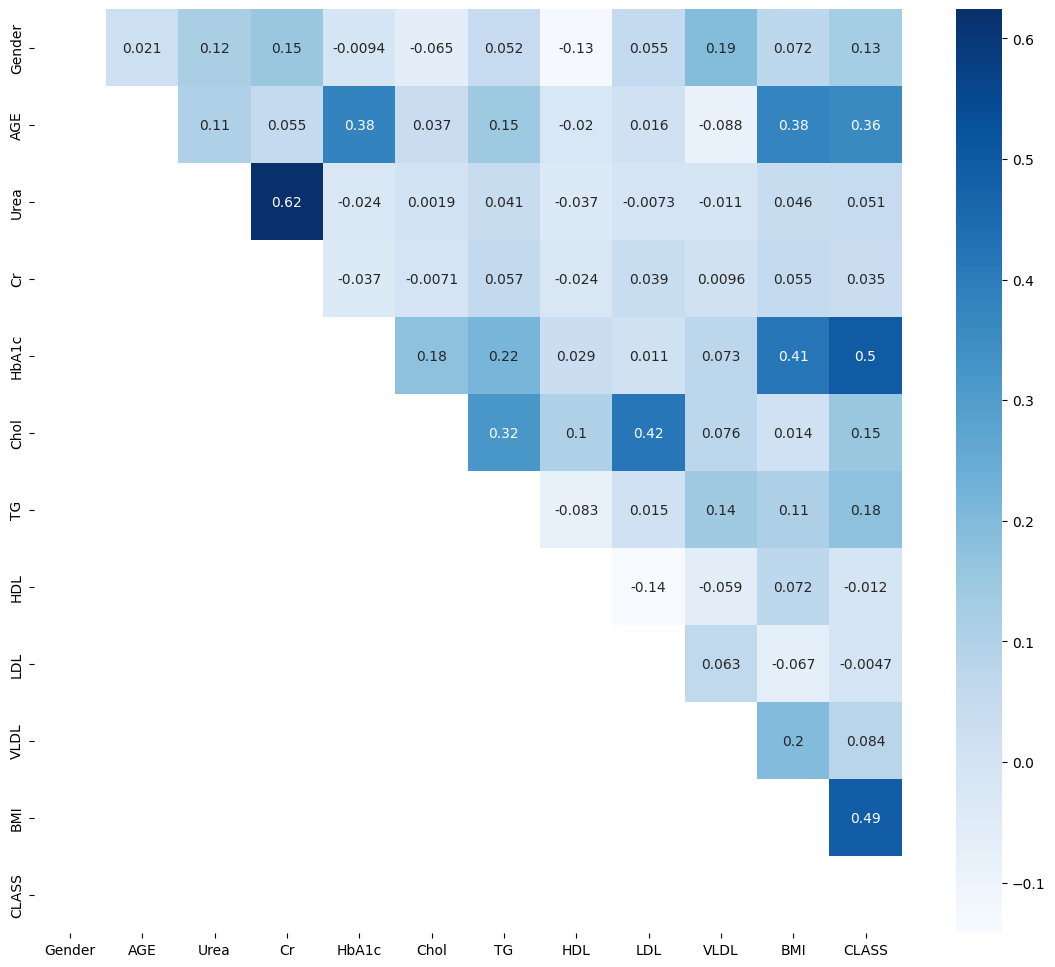

In [80]:
plt.figure(figsize=(14,12))
sns.heatmap(corr_values,cmap='Blues',annot=True)
plt.show()

In [81]:
#sns.pairplot(data)

In [82]:
X = data.drop('CLASS',axis=1)
y = data['CLASS']

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=2)

In [85]:
y_train.value_counts(normalize=True)

CLASS
1    0.897333
0    0.102667
Name: proportion, dtype: float64

# Creating model

without regularization

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [87]:
model = LogisticRegression()

In [88]:
model.fit(X_train,y_train)

LogisticRegression()

In [89]:
model_2 = LogisticRegression(solver='liblinear').fit(X_train,y_train)

**With regularization**

In [90]:
from sklearn.linear_model import LogisticRegressionCV
model_l1 = LogisticRegressionCV(Cs=10,cv=4,penalty='l1',solver='liblinear').fit(X_train,y_train)

In [91]:
model_l2_lbfgs = LogisticRegressionCV(Cs=10,cv=4,penalty='l2').fit(X_train,y_train)

In [92]:
model_l2 = LogisticRegressionCV(Cs=10,cv=4,penalty='l2',solver='liblinear').fit(X_train,y_train)

**With scalling**

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_std = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

In [94]:
model_l2_lbfgs_std = LogisticRegressionCV(Cs=10,cv=4,penalty='l2').fit(X_train_std,y_train)

showing result

In [95]:
y_pred = list()
y_prob = list()

coeff_labels = ['model', 'model_2', 'model_l1','model_l2','model_l2_lbfgs']
coeff_models = [model, model_2, model_l1,model_l2,model_l2_lbfgs]

for lab,mod in zip(coeff_labels,coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test),name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1),name=lab))
    
y_pred.append(pd.Series(model_l2_lbfgs_std.predict(X_test_std),name='model_l2_lbfgs_std'))
y_prob.append(pd.Series(mod.predict_proba(X_test_std).max(axis=1),name='model_l2_lbfgs_std'))

In [96]:
y_pred=pd.concat(y_pred,axis=1)
y_prob=pd.concat(y_prob,axis=1)

In [97]:
y_pred.head()

,model,model_2,model_l1,model_l2,model_l2_lbfgs,model_l2_lbfgs_std
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,0,0,0,0,0,0
4,1,1,1,1,1,1


In [98]:
y_prob.head()

,model,model_2,model_l1,model_l2,model_l2_lbfgs,model_l2_lbfgs_std
0,0.835046,0.844368,0.986373,0.995694,0.988929,1.0
1,0.999704,0.999660,0.999998,1.000000,0.999996,1.0
2,0.964522,0.947284,0.998561,0.999700,0.998302,1.0
3,0.598120,0.542281,0.901412,0.946465,0.884613,1.0
4,0.999910,0.999949,1.000000,1.000000,1.000000,1.0


In [99]:
coeff_labels = ['model', 'model_2', 'model_l1','model_l2','model_l2_lbfgs','model_l2_lbfgs_std']

In [100]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix

metrics = list()
cf_mat = dict()

for lab in coeff_labels:
    precision,recall,fscore,_ = score(y_test,y_pred[lab],average='weighted')
    
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    cf_mat[lab] = confusion_matrix(y_test,y_pred[lab])
    
    metrics.append(pd.Series({'precision': precision,
                             'recall': recall,'fscore': fscore,'accuracy': accuracy},name=lab))
    
metrics= pd.concat(metrics,axis=1)

In [101]:
metrics

,model,model_2,model_l1,model_l2,model_l2_lbfgs,model_l2_lbfgs_std
precision,0.934863,0.925821,0.968,0.961570,0.96,0.961570
recall,0.936000,0.932000,0.968,0.960000,0.96,0.960000
fscore,0.925180,0.923693,0.968,0.960651,0.96,0.960651
accuracy,0.936000,0.932000,0.968,0.960000,0.96,0.960000


model with L1 regularization is performing best

<Axes: >

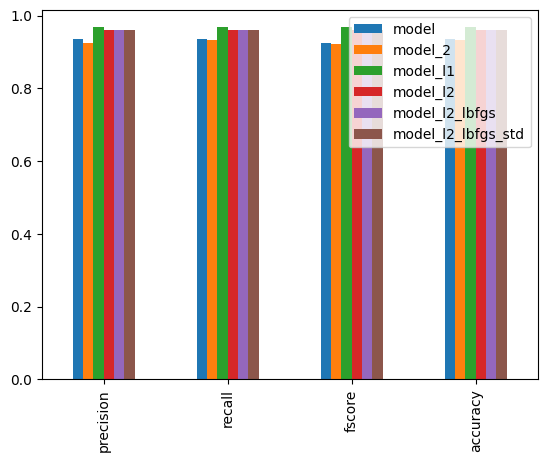

In [102]:
metrics.plot(kind='bar')

In [103]:
input_data = (0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24)
#changing the data to numpy array
input_data_numpy = np.asarray(input_data)
input_data = input_data_numpy.reshape(1,-1)

prediction = model_l1.predict(input_data)

if(prediction==0):
    print('The patient has no diabetes.')
else:
    print('The patient has diabetes.')


The patient has no diabetes.


# Creating Premium version

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
#the parameters to be fit
param_grid = {
    'n_estimators': [15, 25, 50, 100, 200, 400],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'subsample': [1.0, 0.5]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),
                          param_grid=param_grid, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'n_estimators': [15, 25, 50, 100, 200, 400],
                         'subsample': [1.0, 0.5]},
             scoring='accuracy')

In [105]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 15, 'subsample': 1.0}

In [106]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = grid_search.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       1.00      0.99      0.99       225

    accuracy                           0.99       250
   macro avg       0.96      0.98      0.97       250
weighted avg       0.99      0.99      0.99       250



In [107]:
accuracy_score(y_pred,y_test)

0.988

In [108]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [109]:
k_param = {
    'n_neighbors': [3,5,7,9,11]
}
k_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=k_param, scoring='accuracy',
                       n_jobs=-1)
k_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='accuracy')

In [110]:
k_search.best_params_

{'n_neighbors': 5}

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
estimators = [('LR',LogisticRegressionCV(Cs=10,cv=4,penalty='l2')),('KNN',KNeighborsClassifier(n_neighbors=5)),('dt',DecisionTreeClassifier())]
clf = StackingClassifier( estimators=estimators, final_estimator= SVC())

In [113]:
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('LR', LogisticRegressionCV(cv=4)),
                               ('KNN', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=SVC())

In [114]:
y_pred=clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.992

In [121]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       1.00      1.00      1.00       224

    accuracy                           0.99       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.99      0.99      0.99       250



# Saving the model

In [116]:
import pickle

In [117]:
filename = 'diabetes_free.pkl'
pickle.dump(model_l1, open(filename, 'wb'))

In [118]:
filename = 'diabetes_premium.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [119]:
diabetes_free2 = pickle.load(open('diabetes_free.pkl','rb'))

In [120]:
diabetes_free2.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])